<a href="https://colab.research.google.com/github/Chikuji/PythonPcc/blob/master/aula1_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Na pratica - Aula 1- 20200420**


In [2]:
print("Felipe Kenji")

Felipe Kenji


In [0]:
#atribuição de variável

nome_do_filme = "Totoro, o filme"

In [4]:
print(nome_do_filme)

Totoro, o filme


In [0]:
#importando a biblioteca pandas
import pandas as pd

In [6]:
#exportar um arquivo de filmes CSV (documentação: https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
#filmes será um dataframe
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
#trocar os nomes das colunas de inglês para portugês
filmes.columns = ["filmeId","titulo","generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# lendo a documentação de um método/atribulo
# basta colocar ? na frente do comando

?filmes.head

In [0]:
?filmes

In [10]:
#Quantidade de flmes no dataset filmes
len(filmes)

9742

In [11]:
#exportar dataset de avaliação dos filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
#.head() só visualisa 5 linhas, para descoprir a forma do dataset usaremos .shape

avaliacoes.shape

(100836, 4)

In [13]:
#para saber o numero de linhas len()

len(avaliacoes)

100836

In [14]:
#trocar os nomes das colunas de inglês para portugês

avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
#separar as avaliações do filmeId1 com o método avaliacoes.query("filmeId==1")
#ciando assim uma tabela apenas do filmeId1
avaliacoes_filme1 = avaliacoes.query("filmeId==1")
avaliacoes_filme1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [16]:
#para analisar estatísticas gerais dessa tabela .describe()
avaliacoes_filme1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [17]:
#calculando apenas a media do filme1
avaliacoes_filme1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [18]:
#calcular toda a tabela de avaliacoes
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [19]:
#obter os valores da coluna de notas 
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [20]:
avaliacoes["nota"].mean()

3.501556983616962

In [21]:
#agora vamos calcular a média das notas apenas do filme1
avaliacoes_filme1["nota"].mean()

3.9209302325581397

In [22]:
#Queremos calcula a média de todos os filmes. O método .group(filmeId)
#ira agrupar a coluna de fimes, depois pegaremos a coluna["nota"] e tiramos a média .mean()

notas_medias_por_filme =avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [23]:
#Quantidade de filmes no dataset avaliacoes
len(notas_medias_por_filme)

9724

In [0]:
#criar um novo dataframe utilizando o .join() -> 
#filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

In [25]:
#primeiro veremos as tabelas que iremos unir
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [26]:
notas_medias_por_filme


filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [27]:
#aqui iremos unir as duas tabelas
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [28]:
len(filmes_com_media)

9742

In [29]:
#organizar a tabela pela nota decrescente 
filmes_com_media.sort_values("nota",ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [30]:
filmes_sem_nota = filmes_com_media[filmes_com_media["nota"].isna()]
filmes_sem_nota.head()

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN


Até aqui: análise e manipulação de dados

 **Agora iremos plotar gráficos**

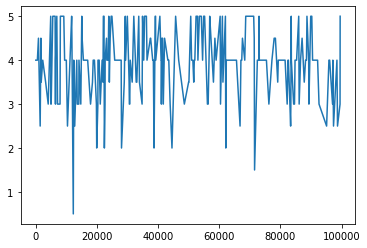

In [31]:
#primeiro utilizando .plot() nas avaliações pelas notas
avaliacoes.query("filmeId == 1")["nota"].plot()

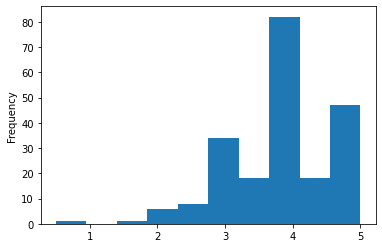

In [32]:
#para melhorar esse grafico mudaremos o parametro kind (filme Toy Story)
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

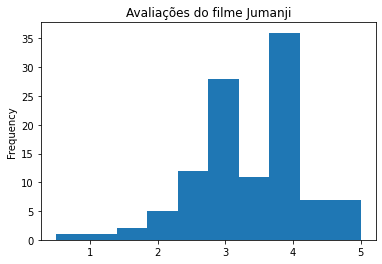

In [33]:
#vamos analiar o filme 2 o colocar título no gráfico
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',title="Avaliações do filme Jumanji")

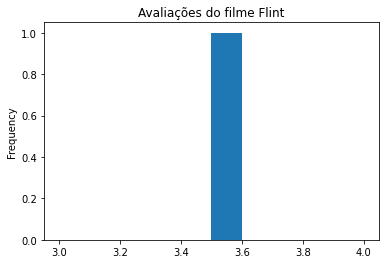

In [34]:
#vamos analiar o filme 2 o colocar título no gráfico
avaliacoes.query("filmeId == 193585")["nota"].plot(kind='hist',title="Avaliações do filme Flint")

# *Desafios - Aula 1*

## **DESAFIO 1**

In [35]:
# O Paulo fez uma análise rápida e disse que tem 18 filmes 
# sem avaliações, será que ele acertou?
filmes_sem_nota = filmes_com_media[filmes_com_media["nota"].isna()]
filmes_sem_nota.head(18)



,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [36]:
filmes_sem_nota.count()

filmeId    18
titulo     18
generos    18
nota        0
dtype: int64

In [37]:
len(filmes_sem_nota)

18

## **DESAFIO 2**

In [38]:
# Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.
# OK -> filmes_com_media.columns = ["filmeId","titulo","generos","nota_media"] 
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [39]:
# filmes_com_media.rename(columns={'nota':'nota_media'}) pode ser assim tbm
filmes_com_media.columns = ["filmeId","titulo","generos","nota_media"] 
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## **DESAFIO 3**

In [40]:
# Colocar o número de avaliações por filme, isto é, não só a média 
# mas o TOTAL de votos por filme.

notas_qtd_por_filme =avaliacoes.groupby("filmeId")["nota"].count()
notas_qtd_por_filme.columns = ["filmeId","qtd"]
notas_qtd_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [41]:
filmes_com_media

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [42]:
# novo dataframe com a quantidade de votos

filmes_com_media_qtd = filmes_com_media.join(notas_qtd_por_filme, on="filmeId")
filmes_com_media_qtd.columns = ["filmeId","titulo","genero","nota_media","qtd_votos"]
filmes_com_media_qtd.sort_values("qtd_votos",ascending=True).head(20)


,filmeId,titulo,genero,nota_media,qtd_votos
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.0
3014,4032,"Everlasting Piece, An (2000)",Comedy,4.0,1.0
6670,57526,Untraceable (2008),Crime|Thriller,3.0,1.0
6669,57522,First Sunday (2008),Comedy|Crime,3.5,1.0
6667,57502,Cat Soup (Nekojiru-so) (2001),Adventure|Animation|Drama|Horror,4.0,1.0
6666,57499,Heaven and Earth (Ten to Chi to) (1990),Action|Adventure|Drama|War,3.0,1.0
6665,57421,Hatchet (2006),Comedy|Horror,4.0,1.0
6663,57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy,0.5,1.0
6659,57147,Cassandra's Dream (2007),Crime|Drama|Thriller,4.0,1.0
3025,4046,Friendly Persuasion (1956),Drama,4.0,1.0


## **DESAFIO 4**

In [43]:
notas_medias_por_filme =round(avaliacoes.groupby("filmeId")["nota"].mean(),2)
notas_medias_por_filme.head()

filmeId
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: nota, dtype: float64

## **DESAFIO 5 & DESAFIO 6**

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)
Contar o número de aparições de cada genero.

In [44]:
# primeiro importar numpy as np
# criar um data generos_filmes da tabela filmes_com_media
# criar generos que contabiliza quantos votos unicos por genero

import numpy as np

generos_filmes = filmes_com_media.generos.str.split(pat="|")
generos_filmes.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: generos, dtype: object

In [45]:
generos = pd.Series(np.concatenate(generos_filmes)).value_counts()
generos.head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

## **DESAFIO 7**

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

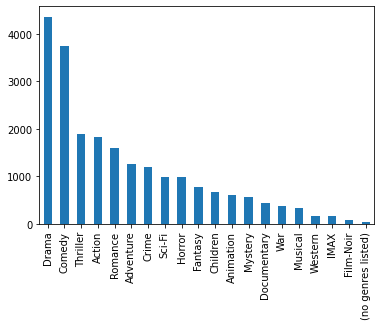

In [46]:
generos.plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

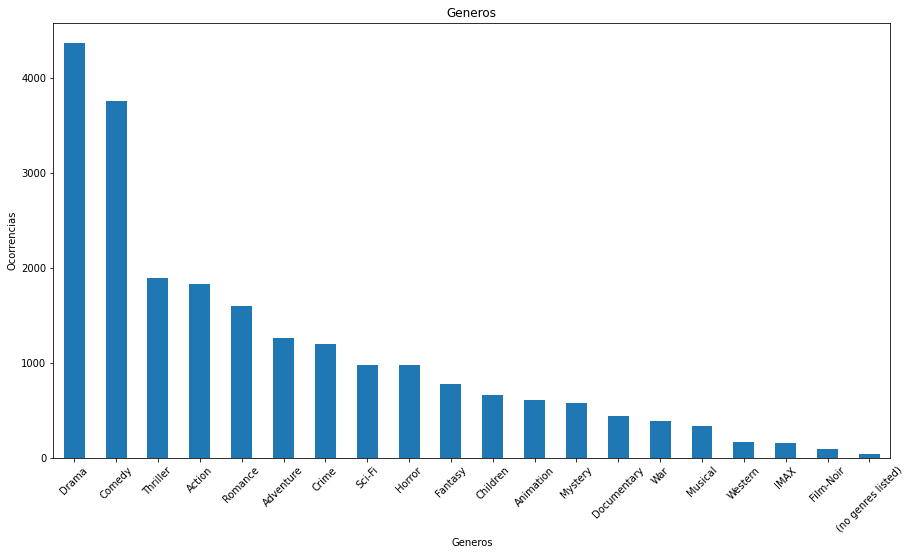

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
generos.plot(kind='bar',title='Generos')
plt.xlabel("Generos")
plt.ylabel("Ocorrencias")
plt.xticks(rotation=45)